## Salary Prediction using Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\harsh\AppData\Local\Temp\ipykernel_13340\2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_csv(r"C:\Users\harsh\Downloads\Salary_Data - Salary_Data.csv")
print(df)

    YearsExperience  Salary
0               1.1   39343
1               1.3   46205
2               1.5   37731
3               2.0   43525
4               2.2   39891
5               2.9   56642
6               3.0   60150
7               3.2   54445
8               3.2   64445
9               3.7   57189
10              3.9   63218
11              4.0   55794
12              4.0   56957
13              4.1   57081
14              4.5   61111
15              4.9   67938
16              5.1   66029
17              5.3   83088
18              5.9   81363
19              6.0   93940
20              6.8   91738
21              7.1   98273
22              7.9  101302
23              8.2  113812
24              8.7  109431
25              9.0  105582
26              9.5  116969
27              9.6  112635
28             10.3  122391
29             10.5  121872


### Split the dataset into Independent(X) and Dependent(y) Variables

In [3]:
X = df.iloc[:, :-1].values    # Features => Years of experience => Independent Variable
y = df.iloc[:, -1].values     # Target => Salary => Dependent Variable

X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

### checking for empty or null values if any drop them down

In [4]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
print(df)

    YearsExperience  Salary
0               1.1   39343
1               1.3   46205
2               1.5   37731
3               2.0   43525
4               2.2   39891
5               2.9   56642
6               3.0   60150
7               3.2   54445
8               3.2   64445
9               3.7   57189
10              3.9   63218
11              4.0   55794
12              4.0   56957
13              4.1   57081
14              4.5   61111
15              4.9   67938
16              5.1   66029
17              5.3   83088
18              5.9   81363
19              6.0   93940
20              6.8   91738
21              7.1   98273
22              7.9  101302
23              8.2  113812
24              8.7  109431
25              9.0  105582
26              9.5  116969
27              9.6  112635
28             10.3  122391
29             10.5  121872


#### provides the summary of dataset like central tendency, dispersion, and shape of the distribution of a dataset

In [7]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [8]:
sal=df[['YearsExperience','Salary']]
sal.head(9)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445


### Creating histogram of both the coloumns

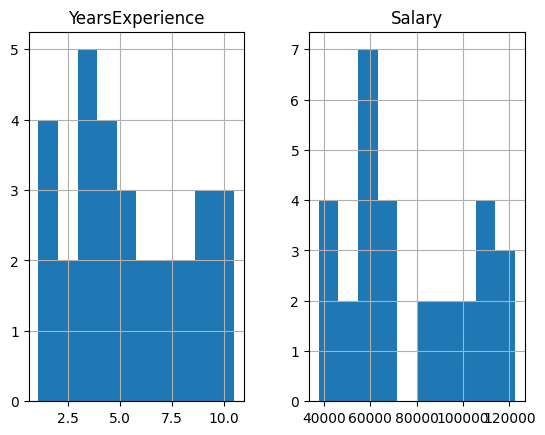

In [9]:
gph=df[['YearsExperience','Salary']]
gph.hist()
plt.show()

Text(0, 0.5, 'Salary')

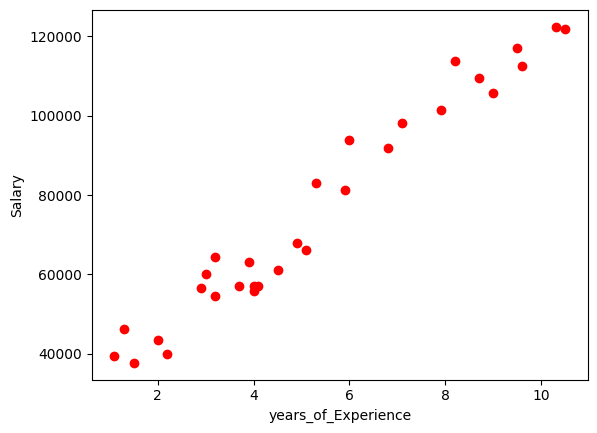

In [10]:
plt.scatter(sal.YearsExperience,sal.Salary, color='red')
plt.xlabel('years_of_Experience')
plt.ylabel('Salary')

### Split the data into train and test set and creating the scatter plot

In [11]:
msk=np.random.rand(len(df))<0.8
train=sal[msk]
test=sal[~msk]

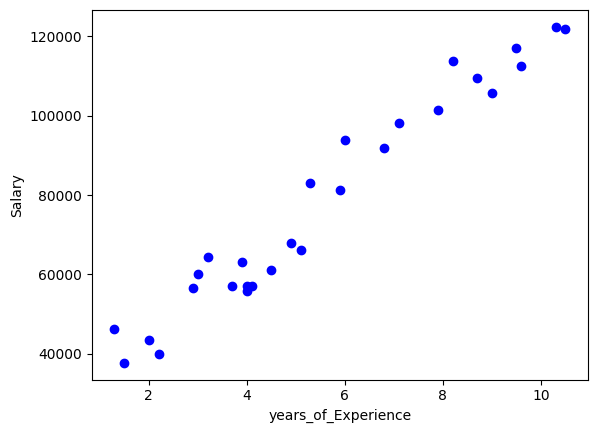

In [12]:
plt.scatter(train.YearsExperience, train.Salary,  color='blue')
plt.xlabel("years_of_Experience")
plt.ylabel("Salary")
plt.show()

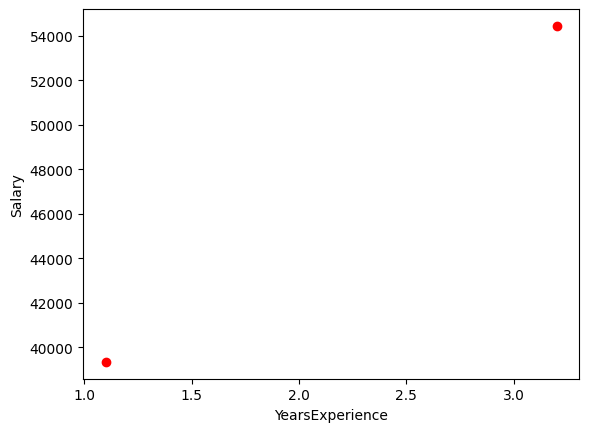

In [13]:
plt.scatter(test.YearsExperience, test.Salary,  color='red')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

### Fitting the model into Linear regression

In [14]:
from sklearn import linear_model
regression=linear_model.LinearRegression()
train_x=np.asanyarray(train[['YearsExperience']])
train_y=np.asanyarray(train[['Salary']])
regression.fit(train_x,train_y)

LinearRegression()

In [15]:
print ('Coefficients: ', regression.coef_)
print ('Intercept: ',regression.intercept_)

Coefficients:  [[9499.0176592]]
Intercept:  [25464.44146637]


### Graph using coefficient and intercept

Text(0, 0.5, 'Salary')

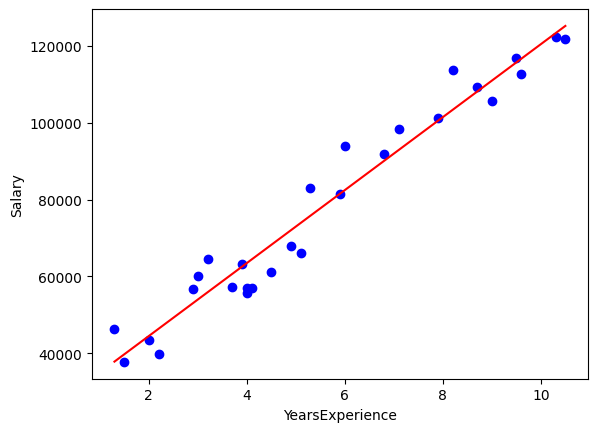

In [16]:
plt.scatter(train.YearsExperience,train.Salary, color='blue')
plt.plot(train_x,regression.coef_[0][0]*train_x + regression.intercept_[0],'-r')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

### Testing

In [17]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['YearsExperience']])
test_y = np.asanyarray(test[['Salary']])
test_y_ = regression.predict(test_x)

### Error between tested and actual

In [18]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))


Mean absolute error: 2422.97


In [19]:
from sklearn.metrics import mean_squared_error 
mse = mean_squared_error(test_y, test_y_)
print("Mean Squared Error:", mse)

Mean Squared Error: 6884162.185461391


In [20]:
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))


Residual sum of squares (MSE): 6884162.19


### Predicting Salary for the custom  yearof experience

In [21]:

custom_YearsofExperience = np.array([[2.0], [2.5], [3.0]])


predicted_Salary = regression.predict(custom_YearsofExperience)

# Print the predicted values
print("Predicted CO2 Emissions for Custom Engine Sizes:")
for i in range(len(custom_YearsofExperience)):
    print(f"YearsofExperience {custom_YearsofExperience[i][0]}, predicted_Salary: {predicted_Salary [i][0]}")

Predicted CO2 Emissions for Custom Engine Sizes:
YearsofExperience 2.0, predicted_Salary: 44462.476784763305
YearsofExperience 2.5, predicted_Salary: 49211.985614362835
YearsofExperience 3.0, predicted_Salary: 53961.494443962365


### Performance of your regression model

R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse

In [22]:
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

R2-score: 0.88


In [23]:
from sklearn.metrics import mean_absolute_error 
mean_absolute_error(test_y,test_y_)

2422.9685421590184

In [24]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(test_y,test_y_)

6884162.185461391

In [25]:
from sklearn.metrics import root_mean_squared_error 
root_mean_squared_error(test_y,test_y_)

2623.7686989255344

In [36]:
({'actual':test_y,'prdicted':test_y_})


{'actual': array([[39343],
        [54445]], dtype=int64),
 'prdicted': array([[35913.36089148],
        [55861.2979758 ]])}